In [90]:
from surprise import KNNWithMeans
from surprise import Dataset,Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [91]:
data = pd.read_csv('Electronic_dataset.csv')

In [92]:
data.head()

,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [93]:
data=data.drop(columns="timestamp")
data

,user_id,prod_id,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0
...,...,...,...
499995,AT1DOX4N48TXJ,B000P3X7RK,2.0
499996,A224J6BHKCLMJM,B005CPGHAA,4.0
499997,A23WSQC26QEFLC,B006FLK1IE,5.0
499998,ARHZCDAH1UTPN,B006W5FHI2,5.0


In [94]:
data=data.rename(columns={"user_id":"user","prod_id":"item"})
data

,user,item,ratings
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0
2,A1SINU2I4IOPNU,B000GBO9IM,4.0
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0
...,...,...,...
499995,AT1DOX4N48TXJ,B000P3X7RK,2.0
499996,A224J6BHKCLMJM,B005CPGHAA,4.0
499997,A23WSQC26QEFLC,B006FLK1IE,5.0
499998,ARHZCDAH1UTPN,B006W5FHI2,5.0


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user     500000 non-null  object 
 1   item     500000 non-null  object 
 2   ratings  500000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 11.4+ MB


In [96]:
data.isna().sum()

user       0
item       0
ratings    0
dtype: int64

In [97]:
data.describe(include="all")

,user,item,ratings
count,500000,500000,500000.000000
unique,448368,130138,NaN
top,A680RUE1FDO8B,B0074BW614,NaN
freq,36,1138,NaN
mean,NaN,NaN,4.013172
std,NaN,NaN,1.379996
min,NaN,NaN,1.000000
25%,NaN,NaN,3.000000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


In [98]:
print(data.user.unique().size)
print(data.item.unique().size)

448368
130138


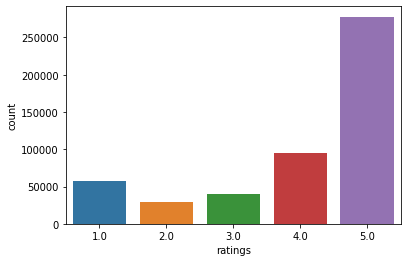

In [99]:
sns.countplot(data["ratings"])

In [100]:
mean_rating_item=pd.DataFrame(data.groupby("item")["ratings"].mean()).sort_values(by=["ratings"],ascending=False).rename(columns={"ratings":"mean_ratings"})
mean_rating_item

,mean_ratings
item,
BT008G3W52,5.0
B003GRJTO2,5.0
B003GKTGYC,5.0
B003GM8VH8,5.0
B003GMATXW,5.0
...,...
B00BS3DOZ6,1.0
B00BS3TMAW,1.0
B002XJ4GMO,1.0


In [101]:
count_rating_item=pd.DataFrame(data.groupby("item")["ratings"].count()).sort_values(by=["ratings"],ascending=False).rename(columns={"ratings":"count_ratings"})
count_rating_item

,count_ratings
item,
B0074BW614,1138
B00DR0PDNE,1094
B007WTAJTO,883
B0019EHU8G,774
B006GWO5WK,770
...,...
B003LCXEHK,1
B003LCVJCC,1
B003LBDTCQ,1


# POPULARITY RECOMMENDATION BY MEAN

In [102]:
popularity_recommendation=mean_rating_item.merge(count_rating_item,on="item")
popularity_recommendation

,mean_ratings,count_ratings
item,,
BT008G3W52,5.0,1
B003GRJTO2,5.0,1
B003GKTGYC,5.0,1
B003GM8VH8,5.0,1
B003GMATXW,5.0,1
...,...,...
B00BS3DOZ6,1.0,1
B00BS3TMAW,1.0,1
B002XJ4GMO,1.0,1


Popularity recommendation by using only mean is not reliable as the number of users who rated the item can be very less and biased

# POPULARITY RECOMMENDATION BY NUMBER OF RATINGS

In [103]:
popularity_recommendation=popularity_recommendation.sort_values(by=["count_ratings"],ascending=False)
popularity_recommendation

,mean_ratings,count_ratings
item,,
B0074BW614,4.465729,1138
B00DR0PDNE,3.943327,1094
B007WTAJTO,4.417894,883
B0019EHU8G,4.740310,774
B006GWO5WK,4.275325,770
...,...,...
B000FW51G6,5.000000,1
B00K303J50,5.000000,1
B00DNGMMWM,5.000000,1


Popularity recommendation by count is slightly reliable as the number of ratings more or less implies popularity, but this does not take mean_ratings into consideration. Let us take mean_ratings for items which were rated more than 50 times and arrange the mean_ratings in descending order to balance count_ratings and mean_ratings so that they can be used as popularity based recommendation system.

# POPULARITY BASED RECOMMENDATION SYSTEM

In [104]:
popularity_recommendation=popularity_recommendation[popularity_recommendation["count_ratings"]>50].sort_values(by=["mean_ratings"],ascending=False)
popularity_recommendation

,mean_ratings,count_ratings
item,,
B000092TT0,4.909091,55
B001MX5YWI,4.904762,63
B0043WJRRS,4.895425,153
B003FVVMS0,4.880342,117
B005LFT3GG,4.852941,68
...,...,...
B002EOVDII,2.525424,59
B003M5IQLU,2.519231,52
B0061R1XI4,2.200000,55


In [105]:
# popularity_recommendation.sort_values(by=["mean_ratings"],ascending=False)

# **COLLOBORATIVE FILTERING**

TAKING SUBSET OF ORIGINAL DATASET WITH 5000 ROWS 

In [106]:
sampledata=data.sample(n=5000)
sampledata

,user,item,ratings
221195,A2QGVEMMYJ07E4,B003VAGXZC,5.0
80670,A1JMYO5M3807VG,B003VPABUK,5.0
442926,A3VM223LODLXID,B0085JPNKK,1.0
188925,A8EF70QE0LI12,B00AHNEKDS,5.0
383673,A3C521Y7WGVNJO,B0031M9SHU,5.0
...,...,...,...
412118,A1VHV2N2M5Z68B,B009HISC3I,4.0
131457,AQ04UVRFJO7DO,B003U7URH6,5.0
458426,A1R5J4S7WVVGLR,B001XUR5F4,5.0
327438,A3HCZ16OHQ2WNO,B0049495KY,5.0


In [107]:
reader = Reader( line_format='user item rating',
    sep=",",
    rating_scale=(1, 5))

In [108]:
surprise_data=Dataset.load_from_df(sampledata,reader)
trainset, testset = train_test_split(surprise_data, test_size=.30,random_state=30)

In [109]:
from surprise import SVD
svd_model=SVD()

In [110]:
svd_model.fit(trainset)

In [111]:
test_pred=svd_model.test(testset)

In [112]:
test_pred

[Prediction(uid='A3T3QAT6MJU9UH', iid='B008HKP8ZW', r_ui=5.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A1HSU1U7M7MM0Z', iid='B000QIWYSM', r_ui=5.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A36M9UYXV36TBC', iid='B006YWCQLO', r_ui=5.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A3W1L08GXYASU3', iid='B00GWSMJGC', r_ui=5.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A3P85ORZDO185M', iid='B008ASF5MC', r_ui=4.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A07053421JJUBMOBN8BJY', iid='B000OTF6G0', r_ui=5.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A21NS06GDEA3V0', iid='B004JZ9G16', r_ui=4.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A1KT1GWCW8F80', iid='B0001MKU2U', r_ui=4.0, est=4.022285714285714, details={'was_impossible': False}),
 Prediction(uid='A1JWLE30O

In [113]:
accuracy.rmse(test_pred)

RMSE: 1.3604


1.360425081102421

In [114]:
accuracy.mae(test_pred)

MAE:  1.0738


1.0738210982800855

In [115]:
test_pred=pd.DataFrame(test_pred)
test_pred

,uid,iid,r_ui,est,details
0,A3T3QAT6MJU9UH,B008HKP8ZW,5.0,4.022286,{'was_impossible': False}
1,A1HSU1U7M7MM0Z,B000QIWYSM,5.0,4.022286,{'was_impossible': False}
2,A36M9UYXV36TBC,B006YWCQLO,5.0,4.022286,{'was_impossible': False}
3,A3W1L08GXYASU3,B00GWSMJGC,5.0,4.022286,{'was_impossible': False}
4,A3P85ORZDO185M,B008ASF5MC,4.0,4.022286,{'was_impossible': False}
...,...,...,...,...,...
1495,A1A7V1T9Q22459,B004UAU7CC,4.0,4.102774,{'was_impossible': False}
1496,A23PLSB1JT0569,B0007OF11M,4.0,4.022286,{'was_impossible': False}
1497,A3F9ZWGY9756Y,B008BDJ0SQ,4.0,4.022286,{'was_impossible': False}
1498,A2XA80SWOW5MEW,B005TN0MMY,5.0,4.091422,{'was_impossible': False}


In [116]:
def recommendations(user_id,num_of_recommendations):
    recommendation=test_pred[test_pred["uid"]==user_id][["uid","iid","r_ui","est"]].sort_values(by="est",ascending=False).head(num_of_recommendations)
    return recommendation

In [128]:
recommendations("A3O3MJAH830CMA",5)

,uid,iid,r_ui,est
1499,A3O3MJAH830CMA,B000YBY2U4,1.0,4.022286


# INSIGHTS

INSIGHTS: Using prediction from Testdata after the above steps(train_test_split and predict testdata) gives only one recommendation (which the user has already rated) as most items are bought only by one user(grey sheep problem). Let us try recommending items which were not previously rated by the user using anti test set.

In [118]:
trainset_new = surprise_data.build_full_trainset()
algo = SVD()
algo.fit(trainset_new)

In [119]:
testset_new=trainset_new.build_anti_testset()
predictions = algo.test(testset_new)
predictions

[Prediction(uid='A2QGVEMMYJ07E4', iid='B003VPABUK', r_ui=4.022, est=4.129032449170238, details={'was_impossible': False}),
 Prediction(uid='A2QGVEMMYJ07E4', iid='B0085JPNKK', r_ui=4.022, est=3.9330881759892162, details={'was_impossible': False}),
 Prediction(uid='A2QGVEMMYJ07E4', iid='B00AHNEKDS', r_ui=4.022, est=4.334233257829146, details={'was_impossible': False}),
 Prediction(uid='A2QGVEMMYJ07E4', iid='B0031M9SHU', r_ui=4.022, est=4.1390143360390255, details={'was_impossible': False}),
 Prediction(uid='A2QGVEMMYJ07E4', iid='B00BT7RAPG', r_ui=4.022, est=4.159073914678626, details={'was_impossible': False}),
 Prediction(uid='A2QGVEMMYJ07E4', iid='B0098F5W0Q', r_ui=4.022, est=4.225968024189344, details={'was_impossible': False}),
 Prediction(uid='A2QGVEMMYJ07E4', iid='B004YHWI7S', r_ui=4.022, est=3.8457684092491684, details={'was_impossible': False}),
 Prediction(uid='A2QGVEMMYJ07E4', iid='B001EXVQJQ', r_ui=4.022, est=4.357986887499726, details={'was_impossible': False}),
 Prediction(u

In [123]:
predictions=pd.DataFrame(predictions)
predictions

,uid,iid,r_ui,est,details
0,A2QGVEMMYJ07E4,B003VPABUK,4.022,4.129032,{'was_impossible': False}
1,A2QGVEMMYJ07E4,B0085JPNKK,4.022,3.933088,{'was_impossible': False}
2,A2QGVEMMYJ07E4,B00AHNEKDS,4.022,4.334233,{'was_impossible': False}
3,A2QGVEMMYJ07E4,B0031M9SHU,4.022,4.139014,{'was_impossible': False}
4,A2QGVEMMYJ07E4,B00BT7RAPG,4.022,4.159074,{'was_impossible': False}
...,...,...,...,...,...
21496223,APYCWU96GRNJ9,B002LITFSM,4.022,3.984275,{'was_impossible': False}
21496224,APYCWU96GRNJ9,B009HISC3I,4.022,4.078283,{'was_impossible': False}
21496225,APYCWU96GRNJ9,B003U7URH6,4.022,4.154839,{'was_impossible': False}
21496226,APYCWU96GRNJ9,B001XUR5F4,4.022,4.079193,{'was_impossible': False}


In [124]:
def new_recommendations(user_id,num_of_recommendations):
    recommendation=predictions[predictions["uid"]==user_id][["uid","iid","r_ui","est"]].sort_values(by="est",ascending=False).head(num_of_recommendations)
    return recommendation

In [126]:
new_recommendations("APYCWU96GRNJ9",5)

,uid,iid,r_ui,est
21492084,APYCWU96GRNJ9,B003ES5ZUU,4.022,4.652451
21491983,APYCWU96GRNJ9,B003ELYQGG,4.022,4.651221
21492320,APYCWU96GRNJ9,B00622AG6S,4.022,4.560882
21492577,APYCWU96GRNJ9,B002WE6D44,4.022,4.514417
21492864,APYCWU96GRNJ9,B0001FTVEK,4.022,4.509266
